In [1]:
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
data = pd.read_csv('sampledata.csv')

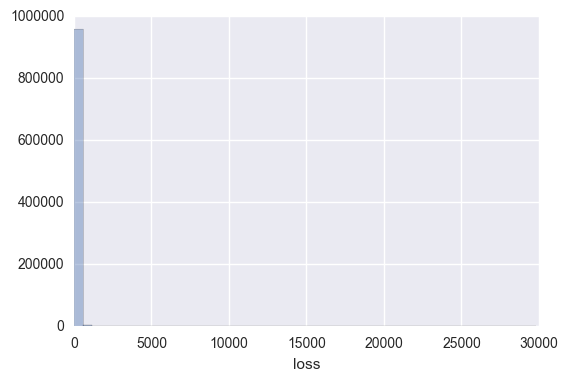

In [3]:
sns.distplot(data['loss'], kde=False)

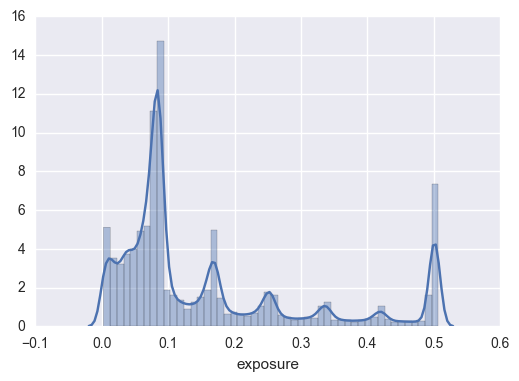

In [4]:
sns.distplot(data['exposure'])

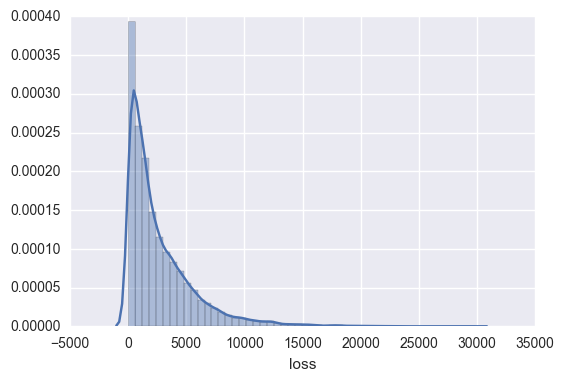

In [5]:
sns.distplot(data['loss'][data['loss'] > 0])

In [6]:
model1 = smf.glm(
	'loss ~ 1',
	data=data,
	family=sm.families.Tweedie(var_power=1.55, link_power=0.0),
	exposure=data['exposure'],
)
res1 = model1.fit(cov_type='HC0')
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   loss   No. Observations:               972304
Model:                            GLM   Df Residuals:                   972303
Model Family:                 Tweedie   Df Model:                            0
Link Function:                    log   Scale:                   4095.78565128
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 27 Jan 2017   Deviance:                   4.3716e+07
Time:                        22:06:01   Pearson chi2:                 3.98e+09
No. Iterations:                     9                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1022      0.222     27.439      0.000       5.666       6.538
==============================================================================
"""

In [7]:
res1.mu.sum() / model1.endog.sum()

1.4361297587497759

In [8]:
H = model1.hessian(res1.params)

In [9]:
# I believe that statsmodels actually has the negative Hessian, so this number should be < 0 if
# the Hessian is positive-definate

sp.linalg.eigvals(H)

array([ 101.02021062+0.j])

In [10]:
model2 = smf.glm(
	'loss ~ np.log(exposure)',
	data=data,
	family=sm.families.Tweedie(var_power=1.55, link_power=0.0),
)
res2 = model2.fit(cov_type='HC0')
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   loss   No. Observations:               972304
Model:                            GLM   Df Residuals:                   972302
Model Family:                 Tweedie   Df Model:                            1
Link Function:                    log   Scale:                   772.287989204
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 27 Jan 2017   Deviance:                   4.0404e+07
Time:                        22:06:16   Pearson chi2:                 7.51e+08
No. Iterations:                    13                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5688      0.020    225.363      0.000       4.529       4.609
np.log(exposure)     0.3140      0.010     31.229      0.000       0.294       0.334
====================================================================================
"""

In [11]:
res2.mu.sum() / model2.endog.sum()

0.99755938717027348

In [12]:
H = model2.hessian(res2.params)

In [13]:
# I believe that statsmodels actually has the negative Hessian, so this number should be < 0 if
# the Hessian is positive-definate

sp.linalg.eigvals(H)

array([ -1623.19312794+0.j, -47649.78439285+0.j])